In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('data_exam.csv')

In [18]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [19]:
df.head()

,X,Y,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [20]:
X = (X - np.mean(X))/np.std(X)

In [21]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [23]:
w = np.random.normal(0,1,X.shape[1])

In [24]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [25]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [26]:
def newton(w,epochs):
    weights = []
    errors = []
    w = w.reshape(-1,1)
    for i in range(epochs):
        pred = np.dot(X_train,w)
        print(pred.shape)
        h = sigmoid(pred)
        #h = h.reshape(-1,1)
        a = h*(1-h)*X_train
        error = loss(Y_train.values.reshape(-1,1),h)
        print(error)
        grad = np.dot(X_train.T,h- Y_train.values.reshape(-1,1))
        hess = a.T @ X_train
        weights.append(w)
        errors.append(error)
        w = w - np.matmul(np.linalg.pinv(hess),grad);
    return weights,errors

In [27]:
weights,error = newton(w,10)

(70, 1)
1.2606687586153187
(70, 1)
0.2924130086073199
(70, 1)
0.2153604703632801
(70, 1)
0.20568099675773077
(70, 1)
0.20475828594091416
(70, 1)
0.20474639123095062
(70, 1)
0.20474638886465263
(70, 1)
0.20474638886465257
(70, 1)
0.2047463888646526
(70, 1)
0.20474638886465255


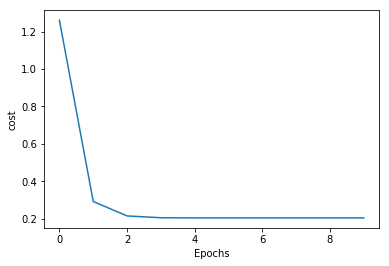

In [28]:
plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.show()

In [29]:
weights = weights[-1]

In [30]:
weights

array([[1.67051925],
       [4.27244187],
       [3.33794242]])

In [31]:
weights = weights.reshape(-1,)

In [32]:
def pred(data):
    return sigmoid(np.dot(data,weights))

In [33]:
a = pred(X_test)

In [34]:
a = a >= 0.5

In [35]:
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [36]:
Y_test = Y_test.reset_index(drop=True)

In [37]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [38]:
predicted_data

,label,Actual_label
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,1,0
6,1,1
7,0,0
8,1,1
9,1,1


In [39]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]

In [40]:
print("Accuracy of the model without any parametersc tunning is :",accuracy)

Accuracy of the model without any parametersc tunning is : 0.9333333333333333


In [41]:
plot_data = pd.concat([X,Y],axis=1)

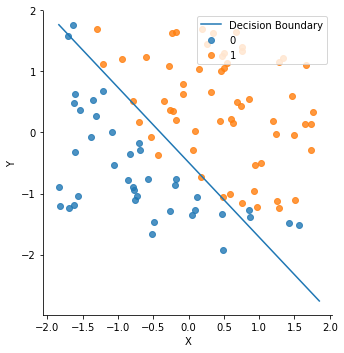

In [42]:
import seaborn as sns 
sns.lmplot( x="X", y="Y", data=plot_data, fit_reg=False,hue = 'label' ,legend=False)
x_0 = min(plot_data['X'])
x_1 = max(plot_data['X'])
plt.plot([x_0,1 * -(weights[0] + weights[1]* x_0)/weights[2]], [ x_1,1 * -(weights[0] + weights[1]* x_1)/weights[2] ],label = "Decision Boundary")
plt.legend(loc='upper right')
